In [1]:
#!pip install tensorflow

In [2]:
import os
import numpy as np
import io
import math
import time
import seaborn as sns
import tensorflow
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [3]:
train_dir = os.path.join(os.getcwd(), 'splitdata/train')
validation_dir = os.path.join(os.getcwd(), 'splitdata/val')

In [4]:
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/local_mode_setup.sh
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/daemon.json    
# !/bin/bash ./local_mode_setup.sh

In [5]:
!pygmentize classification.py

import argparse
import numpy as np
import os
import tensorflow as tf
#from tensorflow.contrib.eager.python import 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

#para prediccion
from tensorflow.keras import backend as K
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard



train_data_gen_args = dict(rescale=1./255,
                        shear_range=0.01,
                        rotation_range = 20,
                        zoom_range=0.2,
                        height_shift_range = 0.2,
                        width_shift_range = 0.2,
                        brightness_range=[0.1, 1.9],
              

In [6]:
import sagemaker
from sagemaker.tensorflow import TensorFlow


model_dir = '/opt/ml/model'
train_instance_type = 'local'

hyperparameters = {'epochs': 1, 'batch_size':8, 'dropout':0.1, 'learning_rate':0.0005}
local_estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [7]:
inputs = {'train': f'file://{train_dir}','validation': f'file://{validation_dir}'}

local_estimator.fit(inputs)

Creating tmprk3imnt9_algo-1-233o2_1 ... 
Attaching to tmprk3imnt9_algo-1-233o2_12mdone
algo-1-233o2_1  | 2021-01-28 20:22:49,654 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-233o2_1  | 2021-01-28 20:22:49,661 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-233o2_1  | 2021-01-28 20:22:49,818 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-233o2_1  | 2021-01-28 20:22:49,836 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-233o2_1  | 2021-01-28 20:22:49,854 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-233o2_1  | 2021-01-28 20:22:49,866 sagemaker-containers INFO     Invoking user script
algo-1-233o2_1  | 
algo-1-233o2_1  | Training Env:
algo-1-233o2_1  | 
algo-1-233o2_1  | {
algo-1-233o2_1  |     "additional_framework_parameters": {},
algo-1-233o2_1  |     "channel_input_dirs": {
algo-1-233o2_1  

In [8]:
s3_prefix = 'tf-caltech-sample4'

traindata_s3_prefix = '{}/data/train'.format(s3_prefix)
validation_s3_prefix = '{}/data/validation'.format(s3_prefix)


train_s3 = sagemaker.Session().upload_data(path='./splitdata/train/', key_prefix=traindata_s3_prefix)
validation_s3 = sagemaker.Session().upload_data(path='./splitdata/val/', key_prefix=validation_s3_prefix)

inputs = {'train':train_s3,'validation':validation_s3}
print(inputs)


{'train': 's3://sagemaker-us-east-1-452432741922/tf-caltech-sample4/data/train', 'validation': 's3://sagemaker-us-east-1-452432741922/tf-caltech-sample4/data/validation'}


In [9]:
train_instance_type = 'ml.p3.2xlarge'
hyperparameters = {'epochs': 15, 'batch_size':8, 'dropout':0.1, 'learning_rate':0.0005}

estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)


train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [10]:
estimator.fit(inputs)

2021-01-28 20:25:33 Starting - Starting the training job...
2021-01-28 20:25:57 Starting - Launching requested ML instancesProfilerReport-1611865532: InProgress
.........
2021-01-28 20:27:23 Starting - Preparing the instances for training.........
2021-01-28 20:28:59 Downloading - Downloading input data...
2021-01-28 20:29:20 Training - Downloading the training image..2021-01-28 20:29:40,538 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2021-01-28 20:29:40,944 sagemaker-containers INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "validation": "/opt/ml/input/data/validation",
        "train": "/opt/ml/input/data/train"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "batch_size": 8,
        "dropout": 0.1,
        "model_dir": "/opt/ml/m

## Crear el Estimador

Puedo volver en cualquier momento y estimar a partir del training job

In [11]:
#estimator

In [12]:
#predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

## Hyperparameter Optimization

In [13]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

In [14]:
{'epochs': 1, 'batch_size':8, 'dropout':0.1, 'learning_rate':0.0005}


hyperparameter_ranges = {'learning_rate': ContinuousParameter(0.0001, 0.001),
                        'dropout': ContinuousParameter(0, 0.4),
                        'batch_size': IntegerParameter(8, 32),
                        'epochs': IntegerParameter(20, 40)}


objective_metric_name = 'validation:loss'
objective_type = 'Minimize'
metric_definitions = [{'Name': 'validation:loss',
                       'Regex': 'val_loss: (\S+)'}]

tuner = HyperparameterTuner(estimator,
                            objective_metric_name,
                            hyperparameter_ranges,
                            metric_definitions,
                            max_jobs=2,
                            max_parallel_jobs=1,
                            strategy='Random',
                            early_stopping_type='Auto',
                            objective_type=objective_type)


In [15]:
tuner.fit(inputs)

................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


In [16]:
predictor = tuner.estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


-----------!

## Model Evaluation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [18]:
train_data_gen_args = dict(rescale=1./255)

data_gen_args = dict(target_size=(224, 224),
        batch_size=16,
        shuffle=True,
        #color_mode='grayscale',
        class_mode='categorical')

In [19]:
train_datagen = ImageDataGenerator(**train_data_gen_args)

In [20]:
test_generator = train_datagen.flow_from_directory('splitdata/test/', **data_gen_args)

Found 22 images belonging to 4 classes.


In [21]:
number_of_examples = 22
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * data_gen_args['batch_size'])) 

test_labels = []
predictions = []
for i in range(0,int(number_of_generator_calls)):
    instances = test_generator[i][0]
    print(instances.shape)
    for instance in instances:
        array = instance.reshape((1,) + instance.shape)
        payload = {
          'instances': array.tolist()
        }
        resp = predictor.predict(payload)['predictions']
        predictions.append(np.array(resp))
        
    test_labels.extend(np.array(test_generator[i][1]))

(16, 224, 224, 3)
(6, 224, 224, 3)


In [22]:
np.array(predictions).shape

(22, 1, 4)

In [23]:
predictions = np.array(predictions).reshape(22,4)

In [24]:
np.argmax(predictions,axis=1)

array([1, 0, 2, 3, 1, 3, 1, 1, 0, 3, 2, 1, 1, 3, 0, 2, 0, 0, 2, 2, 3, 1])

In [25]:
predictions = np.argmax(predictions,axis=1)

In [26]:
labels = np.argmax(np.array(test_labels),axis=1)

In [27]:
labels

array([1, 0, 2, 3, 1, 3, 1, 1, 0, 3, 2, 1, 1, 3, 0, 2, 0, 0, 2, 2, 3, 1])

In [28]:
accuracy_score(labels,predictions)

1.0

In [29]:
test_generator.class_indices

{'078.fried-egg': 0,
 '120.joy-stick': 1,
 '130.license-plate': 2,
 '177.saturn': 3}

In [30]:
classes = list(test_generator.class_indices.keys())

In [31]:
classes

['078.fried-egg', '120.joy-stick', '130.license-plate', '177.saturn']

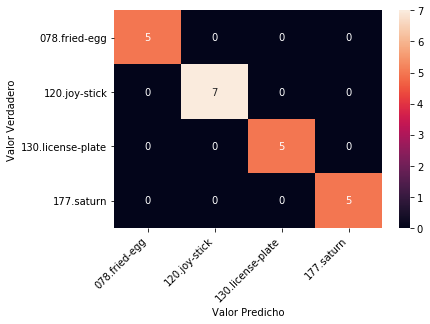

In [32]:
df_cm = confusion_matrix(labels,predictions,labels=np.unique(labels))

heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(classes, rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(classes, rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');
